# Анализа текстуалних података - Ана Карењина

У овој радној свесци наставићемо са истраживањем текста књиге Ана Карењина са платформe пројекта Гутенберг (радне свеске које садрже детаље о припреми и преради текста, као и прерађене табеле које користимо у овој радној свесци се налазе у додатку на крају приручника). 
У претходној радној свесци анализирали смо популарност речи у тексту и видели да се међу 58 најпопуларнијих речи (којима је написано чак 50% садржаја књиге) налазе имена три јунака - Љевин, Вронски и Ана. Ово нас је подстакло да ову свеску базирамо на детаљнијој анализи јунака књиге:
- испитаћемо како се популарност ликова мења из поглавља у поглавље
- реконструисаћемо друштвену мрежу између јунака (Ко се са киме дружи? Јунаци су чворови, везе међу чворовима постоје ако су се њихова имена нашла у близини) и уз помоћ ње сазнати ко су истакнути ликови

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

## Ко су најпопуларнији јунаци књиге Ана Карењина?

Почињемо учитавањем фајла који садржи број помињања имена сваког од потенцијалних јунака по поглављима књиге:

In [2]:
likovi = pd.read_csv('data/tekst data/Ana_likovi_pojavljivanja.csv')
likovi.head(5)

,Gospel,Sorokina,Kouzma,Katya,Oblonsky,Alexandrovna,Lizaveta,Lvov,Alexander,Lvova,...,Lily,Vrede,Mihailov,Pava,Vozdvizhenskoe,Agafea,Lidia,Flerov,Mahotin,Gagin
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ову табелу смо конструисали уз помоћ једноставне процедуре препознавања ликова. Процедура је базирана на чињеници да лична имена почињу велким словом и допунили смо је са пар правила да избацимо још неке речи које имају ту особину али нису имена (нпр. у енглеском имена дана у недељи). За све додатне информације, погледајте детаљније радну свеску посвећену припреми података о књизи Ана Карењина у *data* фолдеру.

In [3]:
len(likovi) # број поглавља

239

Табела ликова садржи све кандидате за ликове који су у књизи поменути више од 5 пута и у свакој од колона налазе се информације о броју помињања одређеног имена у сваком од 239 поглавља књиге. Наша наивна екстракција ликова у табели нам је оставила и неке топониме, али смо их оставили у оптицају, можда се појаве у неком интересантном контексту у даљој анализи.

Погледајмо прво како се мења број ликова у различитим поглављима. То ћемо урадити користећи функцију **astype(bool)** којом је сваки елемент табеле преведен у 1 ако је лик поменут (ако је број различит од 0), а нуле ће остати нуле. Сумирање такве табеле по редовима (**sum(axis=1)**) даће нам број јунака у сваком поглављу:

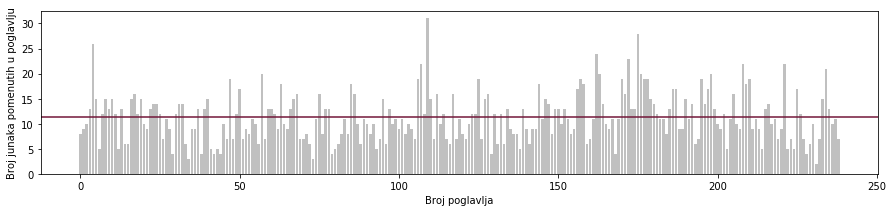

In [4]:
plt.figure(figsize=(15,3))
plt.bar(range(len(likovi)),likovi.astype(bool).sum(axis=1),color = 'silver')
plt.axhline(y=np.mean(likovi.astype(bool).sum(axis=1)), color = '#711436')
plt.xlabel('Broj poglavlja')
plt.ylabel('Broj junaka pomenutih u poglavlju')
plt.show()

Видимо да у неким поглављима постоји више од 30 различитих имена, док су друга поглавља фокусирана на свега пар. Xоризонталном линијом означили смо просечан број различитих имена по поглављу.

Сумирањем табеле *likovi* (по колонама) и њеним сортирањем можемо наћи који ликови су помињани највише пута у целој књизи.

In [5]:
likovi.sum().sort_values(ascending=False)[:10]

Levin             1616
Vronsky            862
Anna               822
Kitty              673
Alexey             632
Alexandrovitch     571
Arkadyevitch       548
Stepan             548
Dolly              307
Ivanovitch         302
dtype: int64

Најпомињаније име је Љевин, праћено великим бројем осталих јунака које можда препознајете из књиге.
Погледајмо сада детаљније како се помињање прва три најпопуларнија имена мења кроз поглавља. Почињемо са Љевином:

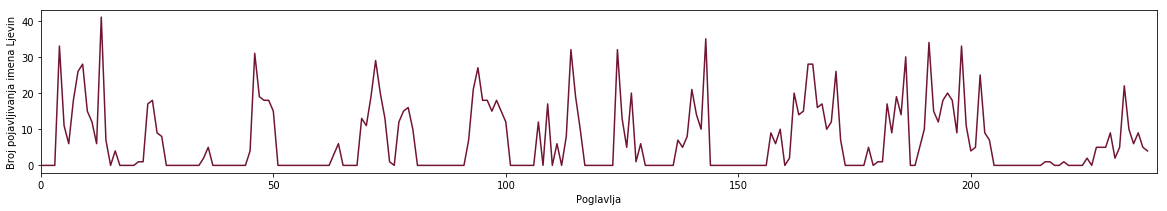

In [6]:
plt.figure(figsize=(20,3))
plt.plot(likovi['Levin'],color='#711436')
plt.xlim([0,240])
plt.ylabel('Broj pojavljivanja imena Ljevin')
plt.xlabel('Poglavlja')
plt.show()

У неким поглављима, име Љевин помиње се и више од 40 пута, а нека поглавља то име уопште не помињу. Можда су ова поглавља са пуно помињана просто много дужа? А можда се у поглављима без Љевина нико и не помиње?
Да бисмо боље разумели популарност јунака (и разрешили неке овакве дилеме), згодно је да овај број помињања имена са нечим упоредимо. Природан кандидат за поређење је просечан број помињања имена у поглављу. Број просечног помињања добићемо сумирајући број помињања сваког од јунака и делећи га са бројем различитих јунака - све ово за свако поглавље:

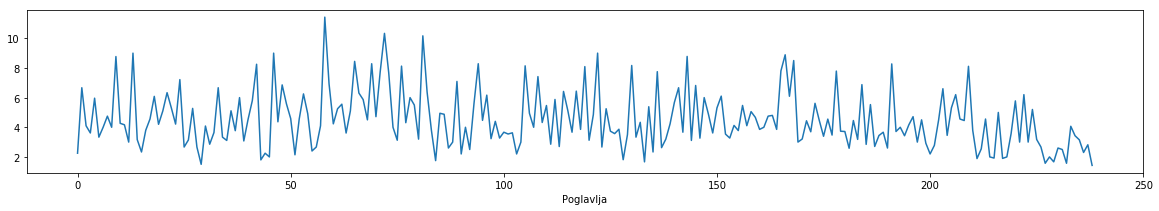

In [7]:
prosecno_pominjanje_junaka = likovi.sum(axis=1)/likovi.astype(bool).sum(axis=1)
plt.figure(figsize=(20,3))
plt.plot(prosecno_pominjanje_junaka)
plt.xlabel('Poglavlja')
plt.show()

Сада можемо видети да ли се Љевино име помиње више или мање од просечног јунака у поглављу (представљаћемо однос ова два броја):

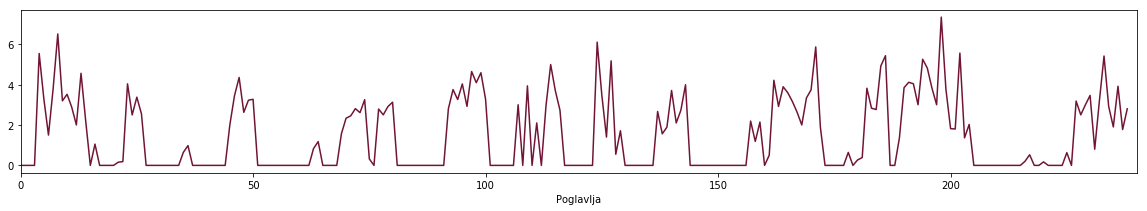

In [8]:
plt.figure(figsize=(20,3))
plt.plot(likovi['Levin']/prosecno_pominjanje_junaka,color='#711436')
plt.xlim([0,240])
plt.xlabel('Poglavlja')
plt.show()

Као што смо и раније приметили, постоје поглавља у којима се Љевиново име не помиње, али и она у којима се име овог јунака помиње и шест пута више од просечно помињаног јунака у поглављу! 
Графици попут овога помажу нам да разумемо да је Љевин име једног од битнијих ликова - не само што је његово име популарно, већ се оно помиње конзистентно кроз целу кљигу (нпр. епизодни лик би могао да буде изузетно популаран али у кратком тренутку и нестане).

На наредном дијаграму, упоредићемо помињање Љевина и Ане из поглавља у поглавље (оба нормирана са просечним појављивањем имена у поглављу):

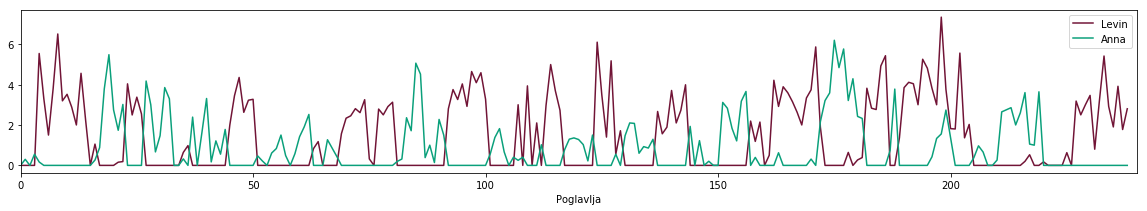

In [9]:
plt.figure(figsize=(20,3))
plt.plot(likovi['Levin']/prosecno_pominjanje_junaka,label='Levin',color='#711436')
plt.plot(likovi['Anna']/prosecno_pominjanje_junaka,label='Anna',color='#0AA07B')
plt.xlim([0,240])
plt.legend()
plt.xlabel('Poglavlja')
plt.show()

Интересантно је да су ретка поглавља у којима се имена Ане и Љевина истовремено појављују, доста чешће су ова два лика доминантна у различитим поглављима. Можете ли идентификовати поглавља у којима се појављују заједно? 

Слично, можемо упредити појављивања имена Ане и Вронског:

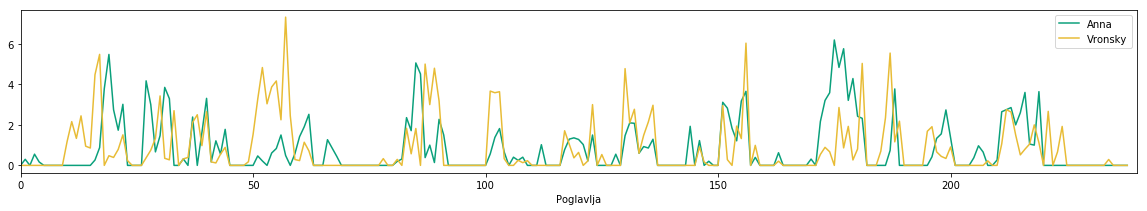

In [10]:
plt.figure(figsize=(20,3))
plt.plot(likovi['Anna']/prosecno_pominjanje_junaka,label='Anna',color='#0AA07B')
plt.plot(likovi['Vronsky']/prosecno_pominjanje_junaka,label='Vronsky', color='#E8BC36')
plt.xlim([0,240])
plt.legend()
plt.xlabel('Poglavlja')
plt.show()

Са друге стране, видимо да се имена Ане и Вронског врло често помињу у истом поглављу. 

Ова сличност у броју појављивања коју назиремо гледајући како бројеви појављивања расту и опадају у сличним поглављима можемо квантификовати коефицијентом корелације, који можемо израчунати функцијом **corr**. Коефицијент корелације говори нам о повезаности између две варијабле, тј. колико је пораст једне праћен порастом друге (у ком случају говоримо о позитивном коефицијенту корелације) или опадањен друге (у ком случају говоримо о негативном коефицијенту). У наставку ћемо из табеле *likovi* узети само вредности за три најпопуларнија јунака која смо анализирали до сада и израчунати коефицијент корелације међу њима:

In [11]:
likovi[['Levin','Vronsky','Anna']].corr()

,Levin,Vronsky,Anna
Levin,1.000000,-0.229816,-0.378872
Vronsky,-0.229816,1.000000,0.266288
Anna,-0.378872,0.266288,1.000000


Видимо да знак коефицијента корелације одговара нашем запажању - појављивања имена Ане и Вронског имају позитивну корелацију, док појаљивања имена Ане и Љевина, као и Вронског и Љевина имају негативну корелацију.

## Мрежа ликова у књизи

У наставку наш циљ је да реконструишемо друшвену мрежу међу јунацима ове књиге.

Мрежа је састављена од чворова (у нашем случају јунаци књиге) и веза међу њима (у случају књиге то може бити дијалог између ликова, познанство, родбински односи, итд.). На пример, у онлајн друштвеним мрежама (попут Инстаграма и Фејсбука) чворови су људи који су повезани пријатељствима или праћењима. У наставку ћемо на основу текста књиге покушати да реконструишемо постојања веза између ликова. Како једноставном анализом књиге није лако утврдити познанство или пријатељство, послужићемо се једном честом апроксимацијом - претпоставићемо да постоји веза међу ликовима кад год се њихова имена нађу раздвојена неким малим бројем речи (енг. co-occurrence networks). 

За конструкцију и анализу мреже, постоји још једна сјајна пајтон библиотека *networkx*, коју ћемо користити у наставку.

Користићемо додатну табелу, у којој се свако од претходно издвојених имена налази излистано са позицијом речи у целокупном тексту (редни број речи од почетка књиге). На основу ове позиције ћемо конструисати везу међу јунацима ако се њихова имена помињу на позицијама чија је разлика мања од 15. (Ова критична удаљеност од 15 речи је параметар који се може мењати, у задацима на крају ове радне свеске вас позивамо да истражите ефекте смањења или повећања овог броја.)

In [12]:
pozicije_junaka = pd.read_csv('data/tekst data/Ana_pozicije_junaka.csv')
pozicije_junaka.head(2)

,Ime junaka,Pozicija junaka
0,Oblonskys,20
1,French,36


Користећи функцију **Graph** из *networkx* библиотеке креираћемо празну мрежу у коју ћемо поступно додати јунаке и везе између њих.

In [13]:
G_junaka = nx.Graph()

Да демонстрирамо како се чворови и везе додају у ову празну мрежу, додаћемо пар чворова и веза и нацртаћемо резултат. Функцијом **add_edge** се у иницијално празну мрежу додају веза по веза између задатих чворова. *Пробајте да додајете неке везе и ви, покрећите једну по једну линију кода да видите поступно шта се дешава.*

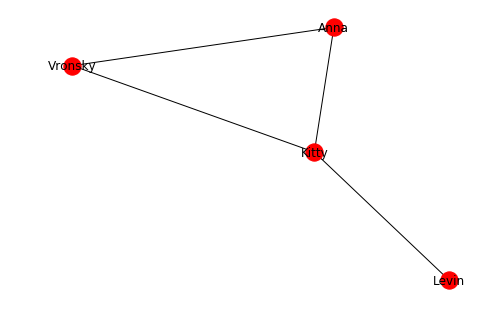

In [14]:
G_junaka.add_edge('Anna','Vronsky')
G_junaka.add_edge('Anna','Kitty')
G_junaka.add_edge('Kitty','Levin')
G_junaka.add_edge('Kitty','Vronsky')
nx.draw(G_junaka, with_labels=True)

Једноставним додавањем парова имена креиран је објекат који се лако може нацртати, али се понешто може и закључити, на пример, функцијом **degree** можемо сазнати колико сваки од чворова има суседа. На овом примеру са 4 чвора чини се да је дати задатак превише лак и да није јасно зашто то радимо функцијом уместо бројећи, али када будемо анализирали мрежу међу наших 164 јунака, видећемо да ће нам дата функција бити од користи.

In [15]:
G_junaka.degree()

DegreeView({'Anna': 2, 'Vronsky': 2, 'Kitty': 3, 'Levin': 1})

За ликове који нису повезани, можемо наћи и најкраћи пут међу њима, тј. ко је особа која их повезује. На пример:

In [16]:
nx.shortest_path(G_junaka,'Anna','Levin')

['Anna', 'Kitty', 'Levin']

Сада када смо видели ову једноставну мрежу и неке њене особине, можемо да наставимо и реконструишемо мрежу на основу текста.
У наставку ћемо проласком кроз табелу ликова и њихових позиција додавати један по један пар ликова у мрежу. Иако није најбоља пракса итерирати кроз редове у оквиру панда библиотеке (постоје бржи и оптимизовани методи да се ураде ствари уместо пролазака кроз колону ред по ред), због прегледности механизма додавања нових веза у мрежу у наставку користимо тај метод. За почетак сачуваћемо име и позицију првог јунака у табели у одговарајуће листе:

In [17]:
ime = [pozicije_junaka.loc[0]['Ime junaka']]
pozicija = [pozicije_junaka.loc[0]['Pozicija junaka']]

а затим пролазимо кроз табелу ред по ред, и преузимамо име јунака и позицију у тексту из сваког новог реда. За свако ново име и нову позицију ћемо прво проверити да ли су најудаљеније претходне позиције даље од 15 речи (и ако јесу избацићемо их из листе), а затим ћемо ново име повезати са свим претходно постојећим члановима листе.
Уколико се тренутно име и име које смо забележили разликују, у мрежу ћемо додати нову везу. Уколико веза постоји (**has_edge**), повећаћемо јој тежину - јунаци који су повезани везом веће тежине су јунаци који се чешће налазе у међусобној близини, а ако веза не постоји, додајемо нову везу са почетном тежином 1 (**аdd_edge**).

In [18]:
G_junaka = nx.Graph() # празна мрежа за почетак
for index, row in pozicije_junaka[1:].iterrows():
    temp_ime = row['Ime junaka']
    temp_pozicija = row['Pozicija junaka']
    
    while len(pozicija)>0:
        if temp_pozicija-pozicija[0]>=15:
            pozicija.pop(0)
            ime.pop(0)
        else:
            break
    for i in range(len(pozicija)):
        if ime[i]!=temp_ime:
            if G_junaka.has_edge(ime[i],temp_ime): # ако веза бећ постоји, отежинићемо је
                G_junaka[ime[i]][temp_ime]['weight']+=1
            else: # ако веза не постоји, додајемо је, почетна тежина је 1
                G_junaka.add_edge(ime[i],temp_ime,weight=1)       
    pozicija.append(temp_pozicija)
    ime.append(temp_ime)

Овим смо конструисали мрежу између јунака и можемо је на следећи начин погледати **draw**:

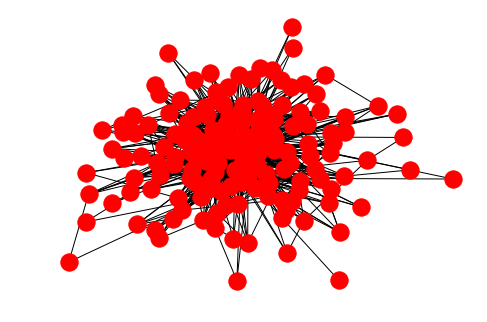

In [19]:
nx.draw(G_junaka)

Међутим, ова слика није претерано информативна ;) више нам служи да нас убеди да смо нешто направили. У наставку ћемо додатно измерити карактеристике ове мреже, а затим пронаћи боље начине да визуелизујемо податке које ова мрежа крије.

Мрежа као објекат у оквиру *networkx* библиотеке има разне доступне функције, хајде да пробамо још неке од њих. Можемо испитати број чворова (**number_of_nodes** да ли очекујемо да ово буде једнако са бројем имена у нашој листи?) и број веза (**number_of_edges**).

In [20]:
G_junaka.number_of_nodes()

164

In [21]:
G_junaka.number_of_edges()

1295

*Размислите о броју веза који би требало да постоји у мрежи да би сваки чвор био повезан са сваким другим чвором. Да ли је овај број близу те вредности?*

Функција **degree** за сваки од јунака, односно чворова у мрежи, враћа нам информацију о броју суседа које дати чвор има, од тога ћемо направити табелу за лакшу даљу анализу и визуализацију:

In [22]:
broj_suseda = pd.DataFrame(G_junaka.degree(),columns=['Ime_junaka','Broj_suseda'])
broj_suseda.head(2)

,Ime_junaka,Broj_suseda
0,Stepan,80
1,Arkadyevitch,76


Сортирајмо сада ликове по броју суседа (што нам је апроксимација за број познанстава сваког од ликова):

In [23]:
broj_suseda.sort_values(by='Broj_suseda',ascending=False)[:10]

,Ime_junaka,Broj_suseda
23,Levin,96
0,Stepan,80
5,Anna,79
45,Vronsky,79
1,Arkadyevitch,76
34,Kitty,71
18,Alexey,68
19,Alexandrovitch,55
28,Sergey,50
17,Moscow,49


Ову листу ћемо упоредити са природним кандидатом, листом појављивања сваког од ових имена у целокупном тексту. Видимо да постоје и сличности и разлике, тј. имамо и неке нове инфромације: 
- Љевин је и јунак који је највише пута поменут и јунак који је поменут у близини највише различитих јунака.
- Степан, чије је име није било тако високо пласирано када се посматрао само број појављивања имена, је добро повезан са осталим ликовима - има више суседа и од Ане.
- На листи 10 најповезанијих појављује се и града Москва која се не налазе међу 10 најчешће поменутих имена. Очигледно је довољно јунака поменуто близу овог града да је он испливао на врх листе по повезаности - чиме добијамо и информацију где се део радње романа одвија.

Нацртајмо сада како изгледа дистрибуција броја суседа (тј. колико има чворова са сваким бројем суседа), то као и до сада можемо урадити функцијом **hist**:

9.0


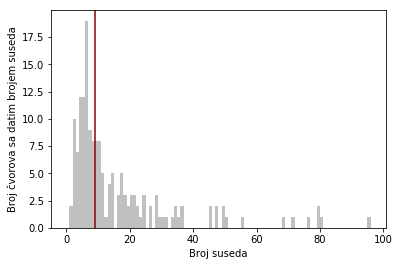

In [24]:
nk = plt.hist(broj_suseda['Broj_suseda'],range(max(broj_suseda['Broj_suseda'])+1),color='silver')
plt.xlabel('Broj suseda')
plt.ylabel('Broj čvorova sa datim brojem suseda')
plt.axvline(x=np.median(broj_suseda['Broj_suseda']),color='darkred')
print(np.median(broj_suseda['Broj_suseda']))

На овом дијаграму дата је ситуација карактеристична и за велики број реалних мрежа - постојање малог броја чворова који имају пуно суседа (приметимо да су свих 10 најбоље повезаних чворова на овом хистограму одвојени од остатка, они су ретки са толиким бројем суседа), док пуно чворова има мало суседа. Вертикалном линијом на позицији медијалне вредности смо приказали половину чворова - 50% чворова има 9 и мање суседа.

Како смо у мрежи сачували и информацију о броју појављивања одређених парова кроз тежине веза, можемо погледати које комбинације чворова имају тежину већу од 100. То ћемо претраживати итерирајући кроз везе (*edges*) у нашој мрежи:

In [25]:
[(u,v,d['weight']) for (u, v, d) in G_junaka.edges(data=True) if d['weight']>100]

[('Stepan', 'Arkadyevitch', 604),
 ('Stepan', 'Levin', 125),
 ('Arkadyevitch', 'Levin', 128),
 ('Anna', 'Vronsky', 138),
 ('Darya', 'Alexandrovna', 216),
 ('Alexey', 'Alexandrovitch', 632),
 ('Levin', 'Kitty', 129),
 ('Sergey', 'Ivanovitch', 319),
 ('Lidia', 'Ivanovna', 113)]

Читаоци књиге ће већ међу овим највише отежињеним везама препознати да су у питању и комбинације имена и средњег имена неких од јунака (нпр. Степан Аркадијевич или Алексеј Александрович), али и неки од парова јунака око којих је фокусирана радња књиге (нпр. Ана и Вронски или Љевин и Кити). 

Сачуваћемо тежине веза (број пута колико се нека два имена појављују једно у близини другог) у одвојеној листи зато што ове податке можемо искористити за дебљину линије на визализацији мреже (отуд две листе, прва приказује реалне тежине сваке везе, док смо у другој скалирали овај број са највећом тежином *M*):

In [26]:
eweights = [d['weight'] for (u, v, d) in G_junaka.edges(data=True)]
M = max(eweights)
eweights = [5*e/M for e in eweights]

Слично, популарност јунака у смислу броја суседа, можемо искористити да одговарајући чворови буду већи:

In [27]:
degrees = list(dict(G_junaka.degree()).values())
degrees = [10*d for d in degrees]

Сада се можемо још једном опробати у цртању мреже, овај пут, контролишући мало више опција са циљем да повећамо информативност слике коју добијамо. На пример, одабраћемо да искористимо функцију **circular_layout** која ће распоредити чворове по кружници. Резултат ове функције су х,у координате за сваки од чворова, што касније можемо проследити функцијама које засебно цртају чворове (**draw_networkx_nodes**) и везе међу њима (**draw_networkx_edges**). У овим функцијама за цртање ћемо додатно дефинисати и боју чворова, њихову величину (*node_size*), транспарентност (*alpha*), и сдебљину линије веза међу чворовима (*width*), зарад јасније визуализације.

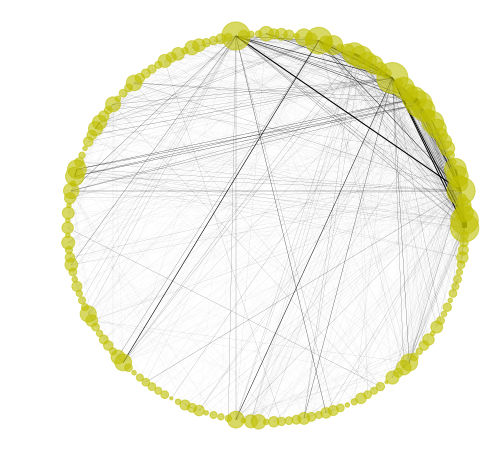

In [28]:
plt.figure(figsize=(8,8));
pos = nx.circular_layout(G_junaka);
nx.draw_networkx_nodes(G_junaka, pos, node_size=degrees, node_color='y', alpha=0.6);
nx.draw_networkx_edges(G_junaka, pos, width=eweights);
plt.axis('off');

Иако значајно лепша од прве мреже коју смо нацртали, ни овде не видимо довољно информација. Велики и битни чворови су груписани заједно, па су и тамније везе међу њима скривене. 

Пробаћемо две додатне стратегије да повећамо информативност мреже коју цртамо. Прво ћемо прикупити у једну листу сва битнија имена која смо разним алатима до сада издвојили (највише помињана имена у књизи, имена са највише суседа у мрежи, имена која су део веза са највећим тежинама). Ову листу имена ћемо искористити да њих означимо на мрежи.

In [29]:
cesto_pominjani = list(likovi.sum().sort_values(ascending=False)[:15].index)
najbolje_povezani = list(broj_suseda.sort_values(by='Broj_suseda',ascending=False)[:14]['Ime_junaka'])
bitni_likovi = cesto_pominjani + najbolje_povezani
for (u, v, d) in G_junaka.edges(data=True): 
    if d['weight']>50:
        bitni_likovi.append(u)
        bitni_likovi.append(v)
bitni_likovi = list(set(bitni_likovi))
bitni_likovi

['Moscow',
 'Dolly',
 'Vronsky',
 'Sergey',
 'Stepan',
 'Alexandrovna',
 'Ivanovitch',
 'Arkadyevna',
 'Agafea',
 'Lidia',
 'Mihalovna',
 'Varenka',
 'Nikolay',
 'Ivanovna',
 'Alexey',
 'Konstantin',
 'Alexandrovitch',
 'Levin',
 'Darya',
 'Anna',
 'Kitty',
 'Sviazhsky',
 'Arkadyevitch']

*Ако желите да истакнете више или мање имена на мрежи, промените параметре који су коришћени у селекцији битних ликова. Издвојили смо по 15 најучесталијих имена и најповезанијих имена, као и све чворове који су повезани везама веће тежине од 50. Ова два броја можете варирати, или ако имате јасне јунаке које желите да видите означене у мрежи, њихова имена можете директно додати у листу битних ликова.*

Друго, уместо кружног распореда међу чворовима, пробаћемо распоред **fruchterman_reingold_layout** који нам даје мало више опција за контролу. Овај распоред је базиран на алгоритму који са једне стране покушава да привуче два чвора ближе један другом ако су повезани, али међу чворовима постоји и одбијање (пошто не желимо да се преклопе). Како је за велики број чворова и веза ово компликован проблем, алгоритам има фиксан број итерација током којих распоређује чворове покушавајући да избалансира ова два ефекта. Контролишући број итерација у функцији (*iterations*) можемо посматрати различите распореде чворова и одабрати неки који нам се чини визуелно прихватљивим. Како алгоритам увек креће од насумичног стања, фиксирањем **np.random.seed(70)** обезбеђујемо репродуцибилност слике која се нама највише свидела (свако ново покретање ћелије ће довести до исте слике, али пробајте да коментаришете ову линију и да видите колико се ситуација разликује, наравно уколико се вама нека друга реализација много више свиди, број 70 у заградама може бити неки други број).

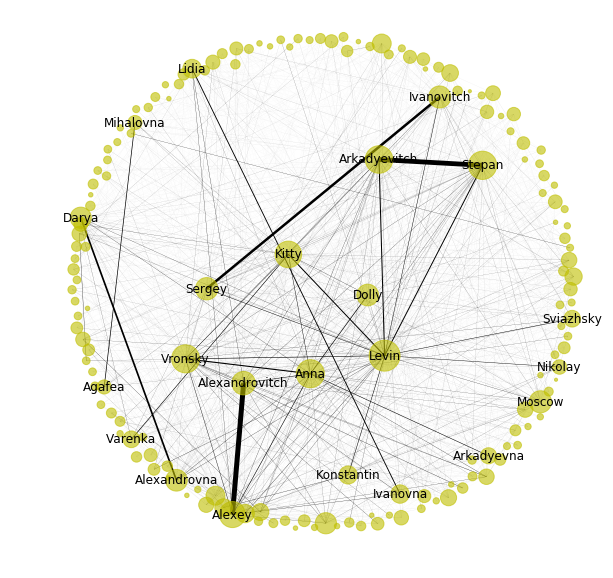

In [30]:
plt.figure(figsize=(10,10));
np.random.seed(70)
pos = nx.fruchterman_reingold_layout(G_junaka,k=15,iterations=150)
popular=[]
pospop={}
for w in bitni_likovi:
    if w in pos.keys():
        popular.append(w)
        pospop[w]=pos[w]
nx.draw_networkx_nodes(G_junaka, pos, node_size=degrees,node_color='y',alpha=0.6);
nx.draw_networkx_edges(G_junaka, pos, width=eweights,);
nx.draw_networkx_labels(G_junaka.subgraph(popular),pospop)
plt.axis('off');

Сада, са назначеним истакнутим ликовима и новим распоредом чворова имамо далеко више интересантних запажања.
- Примећујемо као и претходно да су најистакнутије везе међу именима и средњим именима истих ликова (Алексеј Александрович или Степан Арадијевич). Ово се може исправити спајањем тих чворова у један (испробајте ово, детаљније инструкције су у задацима у наставку). Међутим, некад јунаци имају исто друго име па смо се ми одлучили да овде сачувамо сва имена која смо издвојили.
- Примећујемо разне кључне везе међу јунацима књиге (попут веза између Ане, Вронског и Алексеја или Кити, Вронског и Љевина, затим Љевина и браће, али и много других које ће читаоци сигурно препознати).

На тему анализе друштвених мрежа, један од најпопуларнијих концепата је прича о познанству свих људи у само 6 корака (енг. six degrees of separation). Ово је популарна верзија битног запажања да су у мрежама које нас окружују, у просеку, свака два чвора јако близу, што је последица постојања пар јако добро повезаних чворова кроз које онда пуно најкраћих путева пролази. Хајде да проверимо која је просечна удаљеност између чворова у нашој мрежи. Наравно, библиотека *networkx* има праву функцију за то:

In [31]:
nx.average_shortest_path_length(G_junaka)

2.134370791560676

Дакле, ова мрежа је чак и боље повезана! Свака два јунака ове мреже у просеку имају једног заједничког пријатеља који их може повезати (ако је између чворова пут дужине 2 значи да постоји само 1 чвор између њих).

У овој радној свесци, наш циљ био је да продискутујемо анализу текста и даље од фреквенционе анализе, тј. једноставног броја појављивања речи. Урадили смо ово анализурајући број појављивања ликова по поглављима и видели да се неки често појављују заједно, док су други у готово комплементарним поглављима.
Након тога смо отишли и корак даље и реконструисали мрежу повезаности међу ликовима на основу помињања њихових имена у непосредној близини у тексту. Иако је ова анализа базирана на врло једноставном правилу издвојила нам је неке од најзначајнијих веза међу ликовима из књиге. 

Мреже су поред лепих визуализација и изузетан алат за опис и анализу система - од генских регулаторних мрежа (које повезују гене који међусобно интерагују), преко транспортних мрежа (које повезују различите линије градског превоза и помажу нам да уочимо најслабије карике) до друштвених мрежа (реалних или виртуелних, чија је анализа битна за прегршт ствари, нпр. ширење информација), те се надамо да ћете наставити да их истражујете и самостално. 

## Задаци

1. Нацртати још графика појављивања имена по поглављима и за друге ликове. Покушајте са Кити, али и са неким од епизодних ликова попут Варенке. Да ли се ови графици некако разликују од претходно нацртаних за ликове Љевина, Ане и Вронског?

2. Као што смо истакли раније, нека од имена (чворова) у мрежи одговарају истим ликовима у виду њихових имена и средњих имена. На срећу постоји функција која може да нам помогне у вези са тим - [contracted_nodes](https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.algorithms.minors.contracted_nodes.html). Ова функција нам враћа нову мрежу у којој су назначена 2 чвора спојена у један, чувајући све везе које су претходна два чвора поседовала. Испробајте ову функцију и спојите имена и средња имена неких од ликова. Нацртајте нову мрежу, али обратите пажњу ако користите листе са бројем суседа или тежином мрежа да је и њих потребно прилагодити новој мрежи.

3. При конструкцији мрежа базираних на заједничкој појави две речи у близини (co-occurrence networks), параметар удаљености до које сматрамо да су јунаци повезани (ми смо користили 15) је слободан параметар, тј. одабран је помало арбитрарно, а помало на основу искуства и испробавања. Уколико је овај параметар превише мали, најекстремније 1 - то ће резултовати тиме да има премало чворова и веза, практично ће се успоставити само везе између имена и средњих имена. Са друге стране, превелика удаљеност ће за исход имати потпуно повезану мрежу. Испитајте колико се разликује мрежа када се промени овај параметар критичне удаљености (одаберите коју хоћете вредност). Специјално, проверите да ли се разликује број веза у мрежи, листа чворова са највише суседа и везе са највећом тежином. Нацртајте и нову расподелу чворова по броју суседа и израчунајте медијалну вредност броја суседа нове мреже.